In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Overall Data View:(1)check data; (2)check data statisics;

In [56]:
data = pd.read_csv("原始数据.csv")
data.head()

,order_id,user_id,city,city_level,brand,product_id,product_type,price,quantity,order_amount,scenario,gender,age_group,member,social_touch,motive,order_date,year
0,1,100000,武汉,二线,蜜雪冰城,1001,低糖茶饮,28.42,1,28.42,堂食,女,18-24岁,0,0,品质,2019-07-04,2019
1,2,100001,深圳,一线,奈雪,1002,轻乳茶,29.03,3,87.09,自取,女,45岁以上,1,0,尝鲜,2019-11-30,2019
2,3,100002,深圳,一线,茶百道,1003,燕麦茶,21.80,2,43.60,外卖,女,45岁以上,0,0,社交,2019-04-21,2019
3,4,100003,杭州,二线,其余,1004,奶茶/芝士/其他,21.16,2,42.32,堂食,女,25-34岁,0,1,尝鲜,2019-06-04,2019
4,5,100004,深圳,一线,蜜雪冰城,1005,轻乳茶,23.84,1,23.84,堂食,女,18-24岁,0,0,尝鲜,2019-01-29,2019


In [57]:
data.describe()

,order_id,user_id,product_id,price,quantity,order_amount,member,social_touch,year
count,31894.000000,31894.000000,31894.000000,31894.000000,31894.000000,31894.000000,31894.000000,31894.000000,31894.000000
mean,15947.222957,115946.222957,16947.222957,21.372679,2.005236,42.863503,0.499530,0.500972,2021.780147
std,9206.672032,9206.672032,9206.672032,7.802397,0.815807,24.302539,0.500008,0.500007,1.685772
min,1.000000,100000.000000,1001.000000,8.000000,1.000000,8.000000,0.000000,0.000000,2019.000000
25%,7974.250000,107973.250000,8974.250000,14.580000,1.000000,24.060000,0.000000,0.000000,2020.000000
50%,15947.500000,115946.500000,16947.500000,21.320000,2.000000,35.220000,0.000000,1.000000,2022.000000
75%,23920.750000,123919.750000,24920.750000,28.110000,3.000000,59.430000,1.000000,1.000000,2023.000000
max,31800.000000,131799.000000,32800.000000,35.000000,3.000000,105.000000,1.000000,1.000000,2024.000000


### 2.Data Cleaning:(1)make sure variable "price" and "quantity" has no nagetive number; (2)unified time format; (3) delete duplicated data

In [64]:
### 数据清洗
data.info()

# 检查price和quantity是否有负数（或者查看最小值）
len((data['price'] > 0) == True) # 没有负数

# 转换时间格式
data['order_date'] = pd.to_datetime(data['order_date'])

# 重复值检查(订单编号具有唯一性）
data.duplicated(subset = ['order_id']).sum()
data_clean = data.drop_duplicates(subset = ['order_id']).copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31894 entries, 0 to 31893
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      31894 non-null  int64         
 1   user_id       31894 non-null  int64         
 2   city          31894 non-null  object        
 3   city_level    31894 non-null  object        
 4   brand         31894 non-null  object        
 5   product_id    31894 non-null  int64         
 6   product_type  31894 non-null  object        
 7   price         31894 non-null  float64       
 8   quantity      31894 non-null  int64         
 9   order_amount  31894 non-null  float64       
 10  scenario      31894 non-null  object        
 11  gender        31894 non-null  object        
 12  age_group     31894 non-null  object        
 13  member        31894 non-null  int64         
 14  social_touch  31894 non-null  int64         
 15  motive        31894 non-null  object

### 3. Overall Data Analysis:(1)overall performance analysis; (2)annual increasing trend

In [76]:
### 整体业绩概览分析
# 计算总销售额
data_clean['sales'] = data_clean['price']*data_clean['quantity']
data_clean['sales'].sum()

# 计算总订单量
len(data_clean['order_id'])

# 平均每位用户的下单单价
data_clean['sales'].sum()/len(data_clean['order_id'])

42.86075157232704

In [77]:
# 年度增长趋势表
increase_trend = pd.DataFrame(data_clean[['sales', 'quantity', 'year']].groupby('year')[['quantity', 'sales']].sum())
increase_trend['trend'] = increase_trend['sales'].pct_change() 
increase_trend['trend'] = increase_trend['trend'].apply(lambda x: f"{x:.2%}" if pd.notnull(x) else "NA")
increase_trend # 2020年的销售总额增长量非常快

,quantity,sales,trend
year,,,
2019,7766,163049.24,NA
2020,9606,204021.37,25.13%
2021,10270,219626.84,7.65%
2022,10736,230976.05,5.17%
2023,12100,262560.85,13.67%
2024,13280,282737.55,7.68%


In [ ]:
product_per = pd.DataFrame(data_clean[['sales', 'quantity', 'product_type']].groupby('product_type')[['quantity', 'sales']].sum())
product_sum = product_per['quantity'].sum()
product_per['per%'] = (product_per['quantity']/product_sum*100).round(2)
product_per['avg_price'] = (product_per['sales']/product_per['quantity']).round(2)
product_per # 在售价相似的情况下，低糖茶饮和水果茶的销量占比比较高

In [103]:
# 加入年份进行对比研究
growth_data = pd.DataFrame(data_clean[data_clean['year'].isin([2019, 2020])].groupby(['product_type', 'year'])['sales'].sum())
growth_data
growth_pivot = growth_data.unstack(level = 0)
growth_pivot.loc['growth_rate'] = (growth_pivot.loc[2020]-growth_pivot.loc[2019])/growth_pivot.loc[2019]*100
growth_pivot # 燕麦与低糖的增长最多，轻乳茶最低

sales                                            \
product_type          低糖茶饮      奶茶/芝士/其他           水果茶           燕麦茶   
year                                                                   
2019          45309.940000  11291.250000  40007.230000  28083.650000   
2020          58430.400000  14445.260000  50785.040000  36580.800000   
growth_rate      28.957134     27.933223     26.939656     30.256573   

                            
product_type           轻乳茶  
year                        
2019          38357.170000  
2020          43779.870000  
growth_rate      14.137383

In [50]:
data_clean['brand'].unique()

array(['蜜雪冰城', '奈雪', '茶百道', '其余', '喜茶', '古茗', '沪上阿姨', 'CoCo'],
      dtype=object)

In [29]:
# 年龄段分布
data[['age_group','user_id']].groupby('age_group').count()

,user_id
age_group,
18-24岁,12150
25-34岁,10435
35-44岁,5799
45岁以上,3510


In [42]:
# 计算年龄段百分比
# 计算每个年龄段的唯一用户总数
age_user = data[['age_group','user_id']].groupby('age_group')['user_id'].nunique()

# 计算所有用户总数
sum_user = age_user.sum()

age_user_per = pd.DataFrame({
    'age_group':age_user,
    'user_per(%)':(age_user/sum_user*100).round(2)
}).sort_values('user_per(%)', ascending = False)

age_user_per

,age_group,user_per(%)
age_group,,
18-24岁,12112,38.09
25-34岁,10411,32.74
35-44岁,5777,18.17
45岁以上,3500,11.01


In [34]:
# 区域分布
data[['city','user_id']].groupby('city').count().sort_values('user_id', ascending)

,user_id
city,
广州,2865
上海,2791
北京,2776
深圳,2760
西安,2162
成都,2159
杭州,2128
武汉,2128
南京,2102


In [23]:
# 制作年龄段品牌的透视表
pivot_agepre = data.pivot_table(
    index = 'age_group',
    columns = 'brand',
    values = 'user_id',
    aggfunc = 'sum'
)
pivot_agepre

brand,CoCo,其余,古茗,喜茶,奈雪,沪上阿姨,茶百道,蜜雪冰城
age_group,,,,,,,,
18-24岁,71241124,70551798,237155369,244361256,245052761,76463770,235719663,230145583
25-34岁,64220201,61889608,202191301,202027129,204350365,60696055,205818869,207072466
35-44岁,32291742,35460879,118729093,113836507,111381418,32732424,115217598,112317984
45岁以上,18861397,21470163,67469284,71167545,68828583,21324528,70020904,67921468


<Figure size 1200x600 with 0 Axes>

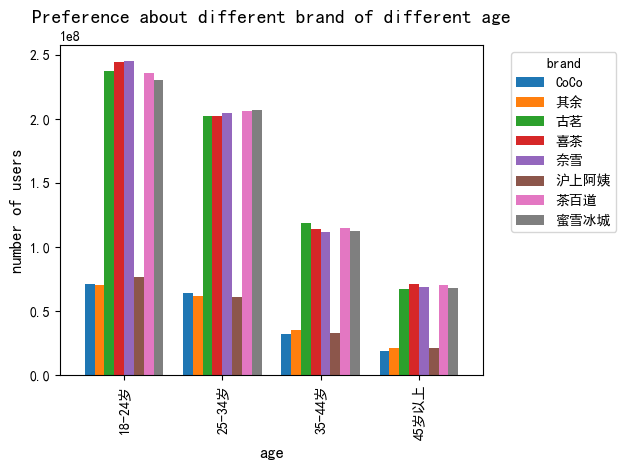

In [25]:
# 分组柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (12,6))
pivot_agepre.plot(kind = 'bar', width = 0.8)

plt.title('Preference about different brand of different age', fontsize = 14)
plt.xlabel('age', fontsize = 12) 
plt.ylabel('number of users', fontsize = 12)
plt.legend(title = 'brand', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()